# **Data Pre-Processing**

In [19]:
##IMPORTING REQUIRD LIBRARIES
#pandas and numpy → handle data.
#matplotlib & seaborn → used for graphs/visual analysis.

##accuracy_score, confusion_matrix, etc. → used for evaluating the model.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **LOADING DATASET**

In [20]:
##LOADING THE DATASET
file_p = "Bankruptcy (2).xlsx"
df =pd.read_excel(file_p)  #This reads your dataset into a DataFrame named df.
print(df.head(10))

   industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   
5              1.0              1.0                    0.0          0.5   
6              1.0              1.0                    0.0          0.0   
7              1.0              1.0                    0.0          0.0   
8              1.0              1.0                    0.0          0.5   
9              1.0              1.0                    0.0          0.5   

   competitiveness  operating_risk       class  
0              0.0             0.5  bankruptcy  
1              0.0             1.0  bankruptcy  
2              0.0         

# **DATA INSPECTION**

In [21]:
###Get the basic data information
print("DATASET SHAPE INFO :",df.shape)   #df.shape -> Shows dataset size
print("DATASET INFORMATION:\n",df.info)  #df.info()-> Shows structure + null count + column types
print("DATATYPES INFO:\n",df.dtypes)     #df.dtypes -> Confirms data types of each feature
print("No.of NULL VALUES:",df.isnull().sum())  #df.isnull().sum() -> Checks missing values
duplicates=df.duplicated().sum()    #df.duplicated().sum() -> Checks duplicate records


DATASET SHAPE INFO : (250, 7)
DATASET INFORMATION:
 <bound method DataFrame.info of      industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0          0.0   
1                0.0              1.0                    0.0          0.0   
2                1.0              0.0                    0.0          0.0   
3                0.5              0.0                    0.0          0.5   
4                1.0              1.0                    0.0          0.0   
..               ...              ...                    ...          ...   
245              0.0              1.0                    1.0          1.0   
246              1.0              1.0                    0.5          1.0   
247              0.0              1.0                    1.0          0.5   
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5         

In [22]:
#Counts how many rows are duplicates.
#Displays them if found.

print("DETAILS OF THE DUPLICATE DATA:\n")
if duplicates>0:
  display(df[df.duplicated()])


DETAILS OF THE DUPLICATE DATA:



,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# **Explore Data Characteristics**

In [23]:
##DATA STATS
#df.describe() shows the summary of numerical data in your dataset, including:
#count (how many values)
#mean (average)
#std (variation/spread)
#min & max (lowest and highest values)
#25%, 50%, 75% (distribution quartiles)
#It helps you quickly understand the range, spread, and central values of your data and detect outliers.

print("DATA STATISTICS\n",df.describe())

DATA STATISTICS
        industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk  
count       250.000000      250.000000  
mean          0.476000        0.570000  
std           0.440682        0.434575  
min           0.000000        0.000000  
25%           0.000000        0.000000  
50%           0.500000   

# **DATA VISUALIZATION**

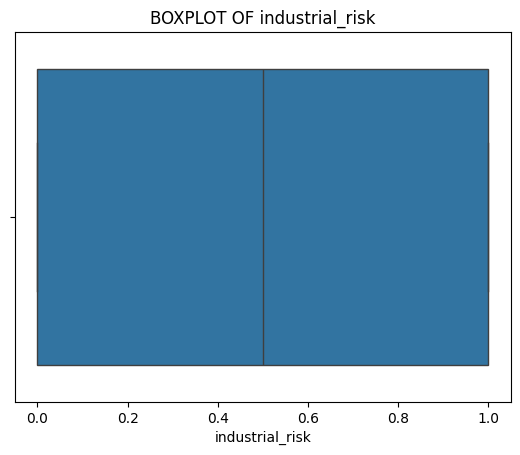

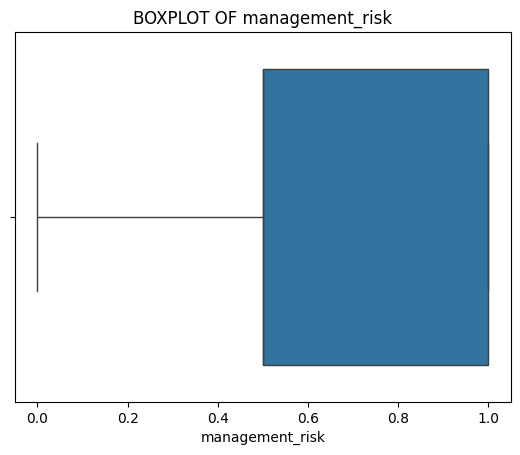

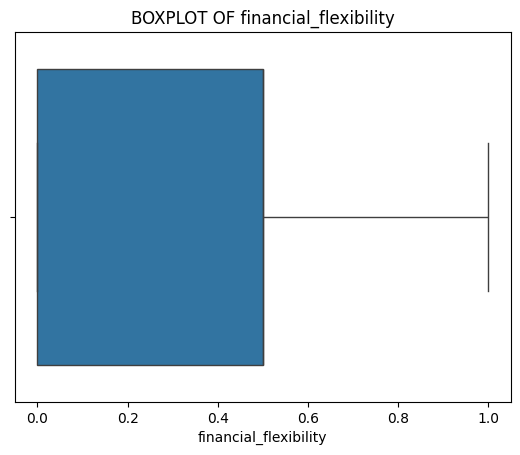

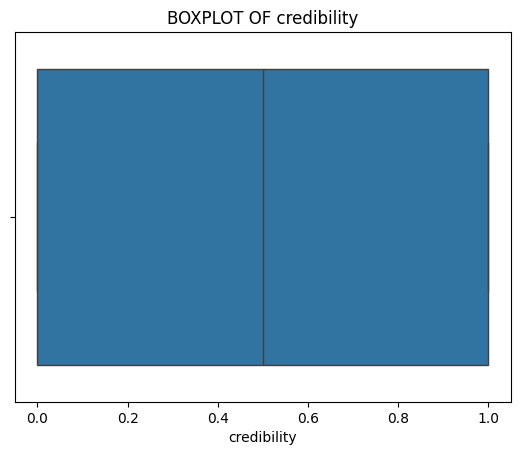

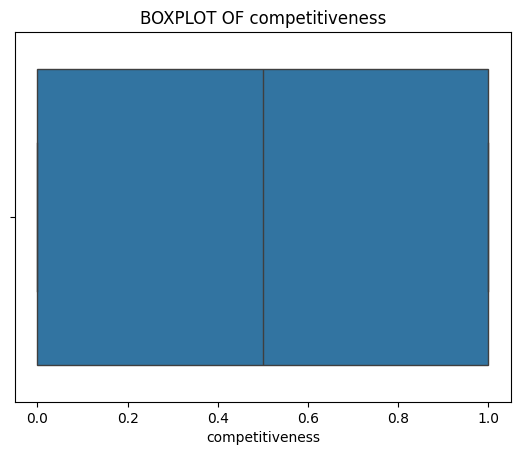

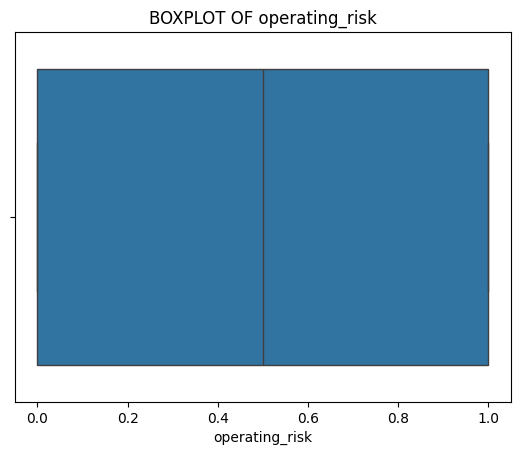

In [24]:
for col in df.columns[:-1]:
  sns.boxplot(x=df[col])
  plt.title(f'BOXPLOT OF {col}')
  plt.show()

#A boxplot helps you detect outliers, and understand data spread (min, max, median, quartiles).
#plt.show() displays each plot one by one.
#This step is useful before scaling or removing outliers.

**The data doesnt have any outliers or the null values which are required to be treated.

1. The Datatypes are numeric(FLoat) and one is object type which is a target  Variable.

2. The data doesntrequire any renaming of column.

3. The data has no outliers.

4. There are duplicates in dataset.**

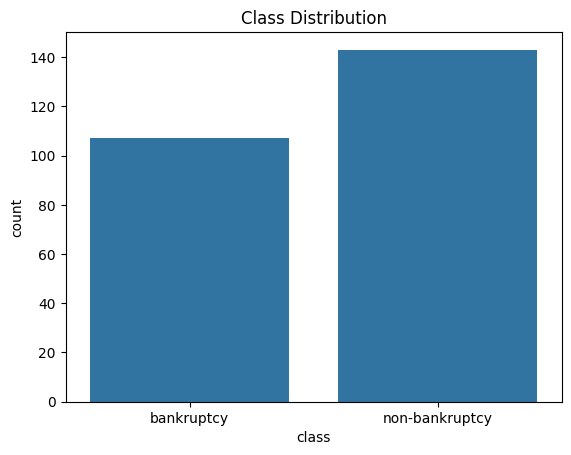

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64


In [25]:
sns.countplot(x='class', data=df) #countplot creates a bar chart showing how many samples belong to each class (e.g., Bankrupt vs Not Bankrupt).
plt.title("Class Distribution")   #Helps you see if the dataset is balanced or imbalanced.
plt.show()

print(df['class'].value_counts())#prints the exact number of records in each class category.

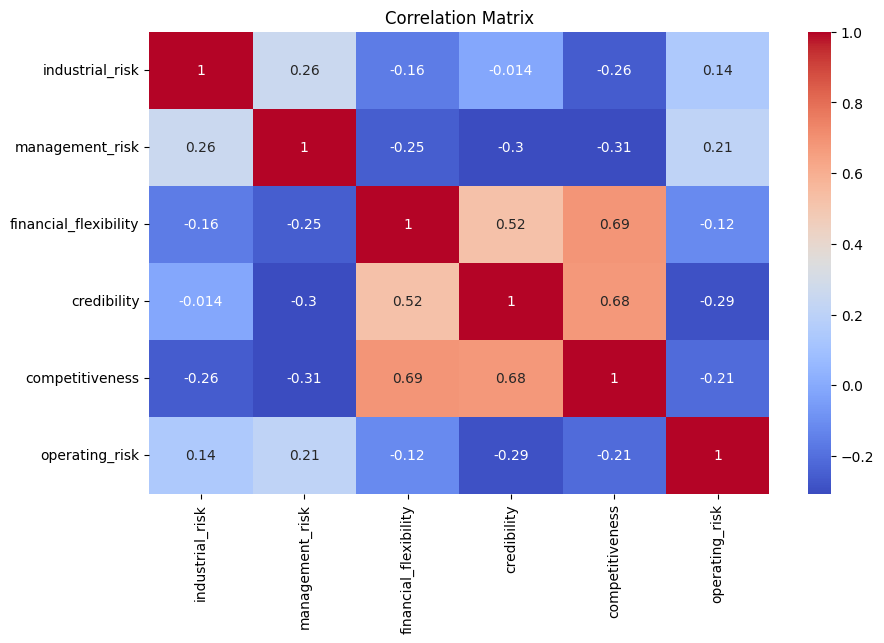

In [26]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # keeps only numeric columns, because correlation works on numbers.
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")  #numeric_df.corr() calculates how strongly features are related to each other.
plt.title("Correlation Matrix")                              #sns.heatmap() displays this correlation visually using colors
plt.show()

In [27]:
# Features and target
##df_clean=df.drop_duplicates()  #removes duplicate rows from the dataset and stores the cleaned data in df_clean.
#print("After removing duplicates:", df_clean.duplicated().sum())  #This line checks again how many duplicate rows are left in df_clean.
#X = df.drop('class', axis=1)
#y = df['class']

#Xc = df_clean.drop('class', axis=1)
#yc = df_clean['class']

#This Step is Needed:
#Machine learning models require input variables (X) and a target label (y) separately.
#Cleaned versions (Xc, yc) help build a model without duplicate data, improving accuracy and reliability.

##scaler = StandardScaler()

# Original dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
# Cleaned dataset
#Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, stratify=yc, random_state=42)
#Xc_train_scaled = scaler.fit_transform(Xc_train)
#Xc_test_scaled = scaler.transform(Xc_test)


# After cleaning
#model.fit(Xc_train_scaled, yc_train)
#yc_pred = model.predict(Xc_test_scaled)
#clean_acc = accuracy_score(yc_test, yc_pred)


#print("Accuracy before cleaning:", round(orig_acc, 4))
#print("Accuracy after cleaning:", round(clean_acc, 4))##Accuracy



#print("\nClassification Report (Before Cleaning):\n", classification_report(y_test, y_pred))
#print("\nClassification Report (After Cleaning):\n", classification_report(yc_test, yc_pred))

# Confusion matrices
#fig, axes = plt.subplots(1, 2, figsize=(10,4))
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=axes[0])
#axes[0].set_title("Before Cleaning")




#sns.heatmap(confusion_matrix(yc_test, yc_pred), annot=True, fmt='d', ax=axes[1])
#axes[1].set_title("After Cleaning")


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

In [29]:
##Model Training and Evaluation
#model = LogisticRegression()
# Before cleaning
#model.fit(X_train_scaled, y_train)
#y_pred = model.predict(X_test_scaled)
#orig_acc = accuracy_score(y_test, y_pred)

# After cleaning
#model.fit(Xc_train_scaled, yc_train)
#yc_pred = model.predict(Xc_test_scaled)
#clean_acc = accuracy_score(yc_test, yc_pred)

In [30]:
df = df.drop_duplicates()


# **MODEL BUILDING AND EVALUATING**

In [32]:
## Feature and target
X = df.drop('class', axis=1)# X holds the features (all columns except 'class')
y = df['class']# y holds the target variable ('class' column)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **MODEL EVALUATION**

In [37]:
models={
    "1. Logistic Regression(Simple, Linear)": LogisticRegression(random_state=42),
    "2. Gaussian Naive Bayes (Simple, Probabilistic)":GaussianNB(),
    "3. K-Nearest Neighbors(Simple, Instance-based)":KNeighborsClassifier(n_neighbors=3),
    "4. Decision Tree (Simple, Rule-based)": DecisionTreeClassifier(max_depth=3,random_state=42)
}

In [39]:
results={}
for name,model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test,y_pred)
  results[name] = round(accuracy, 4)
## Creating Dataframes for clean comparisions
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(results_df.to_markdown(index=False))

| Model                                           |   Accuracy |
|:------------------------------------------------|-----------:|
| 1. Logistic Regression(Simple, Linear)          |          1 |
| 2. Gaussian Naive Bayes (Simple, Probabilistic) |          1 |
| 3. K-Nearest Neighbors(Simple, Instance-based)  |          1 |
| 4. Decision Tree (Simple, Rule-based)           |          1 |


# **VISUALL REPRESENTATION OF MODELS**

/tmp/ipython-input-1386448854.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


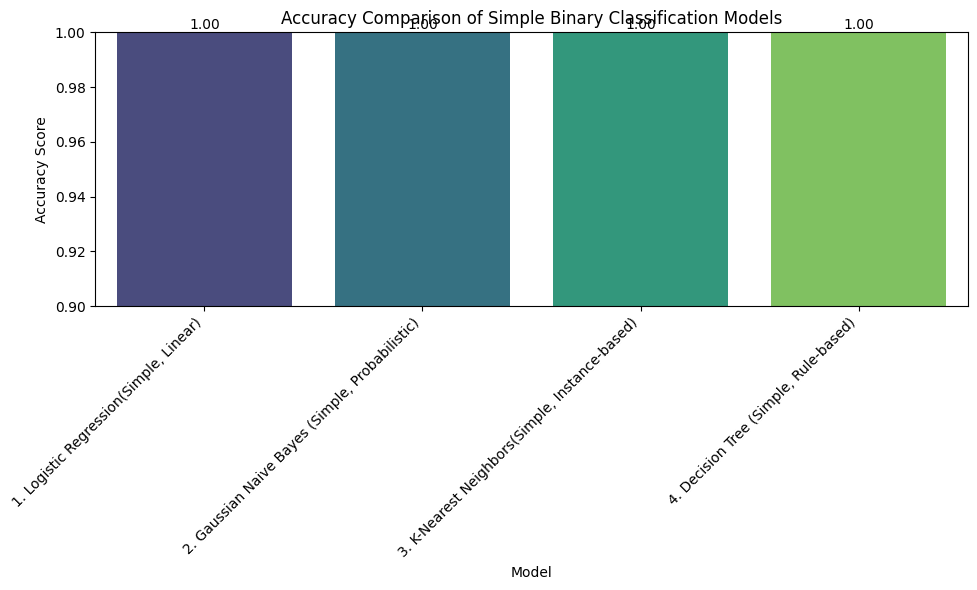

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart using the existing results_df
plt.figure(figsize=(10, 6))

# Plot Model on the x-axis and Accuracy on the y-axis
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')

# Add labels on top of the bars to show the exact score
for index, row in results_df.iterrows():
    # Use index for x-position, and Accuracy for y-position
    plt.text(index, row['Accuracy'], f"{row['Accuracy']:.2f}", ha='center', va='bottom', fontsize=10)

# Set Y-axis to focus on the perfect score (1.0), highlighting the uniform result
plt.ylim(0.9, 1.0)
plt.title('Accuracy Comparison of Simple Binary Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45, ha='right') # Rotate model names for readability
plt.tight_layout()
plt.show()

In [40]:
# 1. Initializing and Train the Final Model (Logistic Regression)
final_model = LogisticRegression(random_state=42)

# You must train it using the scaled training data
final_model.fit(X_train_scaled, y_train)

# The magnitude of the coefficient (absolute value) shows the feature's importance.
# The sign (+ or -) shows the direction of the relationship.
# Get feature names (used X before scaling)
feature_names = X.columns
# Create a DataFrame for easy viewing
coefficients_df = pd.DataFrame({'Feature': feature_names,'Coefficient': final_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)

print("\n--- Logistic Regression Model Coefficients ---")
print("Interpretation: A positive coefficient increases the probability of 'non-bankruptcy', and a negative coefficient increases the probability of 'bankruptcy'.")
print(coefficients_df.to_markdown(index=False))


--- Logistic Regression Model Coefficients ---
Interpretation: A positive coefficient increases the probability of 'non-bankruptcy', and a negative coefficient increases the probability of 'bankruptcy'.
| Feature               |   Coefficient |
|:----------------------|--------------:|
| competitiveness       |    2.23938    |
| financial_flexibility |    1.08147    |
| credibility           |    0.843486   |
| operating_risk        |   -0.00845794 |
| management_risk       |   -0.255615   |
| industrial_risk       |   -0.472488   |


--- Full Evaluation for Logistic Regression ---
Accuracy Score: 1.0000

Classification Report:
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21

Confusion Matrix:



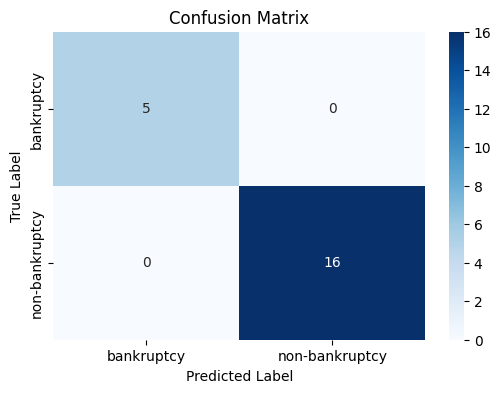

In [45]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"--- Full Evaluation for Logistic Regression ---")
print(f"Accuracy Score: {accuracy:.4f}\n")
print("Classification Report:")
print(class_report)

print("Confusion Matrix:\n")
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

*score confirms that the data is linearly separable, and Logistic Regression is the sufficient, most interpretable model for this problem.


CONFUSION MATRIX SAYS:


No False Negatives (FN = 0): The model never predicted a company would survive when it actually went bankrupt. This is critical for risk modeling.

No False Positives (FP = 0): The model never flagged a healthy company as going bankrupt.

Perfect Separation: The model achieved a 100% classification rate for both classes, confirming the high level of accuracy shown by the $1.00$ score.*

# **DEPLOYMENT STEP **

In [46]:
import pickle

# 1. Save the Trained Model
with open('bankruptcy_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

# 2. Save the Trained Scaler
with open('data_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and Scaler saved using pickle!!!")

Model and Scaler saved using pickle!!!
